# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
# shape of training and test sets
print("Training set shape:", X_train.shape)
print("Training class shape:", y_train.shape)
print("Test set shape:", X_test.shape)
print("Test class shape:", y_test.shape)

Training set shape: (50000, 32, 32, 3)
Training class shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test class shape: (10000, 1)


In [3]:
# print the dimensions of the images in the training set
print("Image dimensions:", X_train.shape[1:])

Image dimensions: (32, 32, 3)


In [4]:
# a more explicit way to extract image dimensions from the training set
image_height = X_train.shape[1]
image_width = X_train.shape[2]
num_channels = X_train.shape[3]
print(f"Image dimensions: {image_height} x {image_width} pixels, {num_channels} channels")

Image dimensions: 32 x 32 pixels, 3 channels


In [5]:
# number of classes
import numpy as np
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

Number of classes: 100


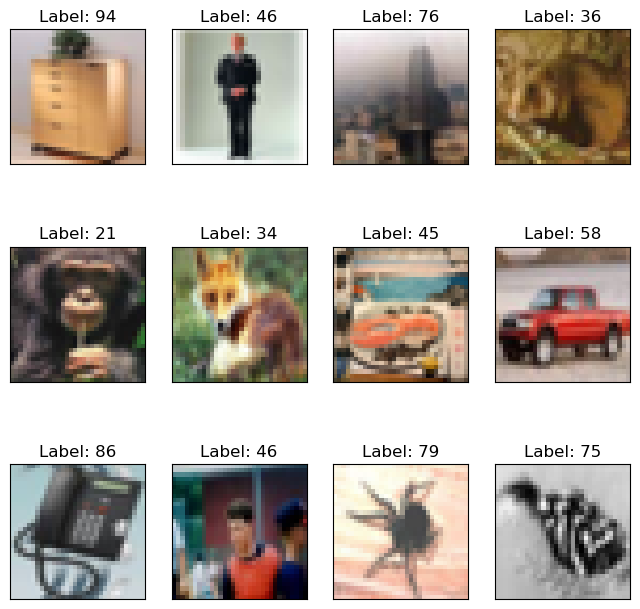

In [6]:
# a few examples to show from the training set

import matplotlib.pyplot as plt
import numpy as np

# generate random indices to select a subset of images from the training set
random_indices = np.random.choice(len(X_train), 12, replace=False)

# creating a 3x4 grid for displaying images 
fig, axes = plt.subplots(3, 4, figsize=(8, 8))

# loop through the grid and populate each subplot with an image, display the image with nearest-neighbor interpolation to preserve original pixel values
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], interpolation='nearest')
    ax.set_title(f"Label: {y_train[random_indices[i]][0]}")

    # removing axis ticks to focus on the image content if exists
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [7]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# normalize the images to have pixel values in the range [0, 1]
# converting pixel values from the range [0, 255] to [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# convert labels to one-hot encoded vectors
# each label is transformed into a binary vector representing the class
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

# split the training data into training and validation sets
# use 80% of the data for training and 20% for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# print the shapes of the resulting datasets to verify the split
print(f"Training data shape: {X_train_split.shape}")
print(f"Validation data shape: {X_val_split.shape}")
print(f"Test data shape: {X_test.shape}")

print(f"Training labels shape: {y_train_split.shape}")
print(f"Validation labels shape: {y_val_split.shape}")
print(f"Test labels shape: {y_test_one_hot.shape}")

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# create a Sequential model
model = Sequential()

# add a convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
# add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add another convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
# add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten the output from the convolutional layers
model.add(Flatten())

# add a fully connected dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# add the output layer with 100 units (one for each class) and softmax activation
model.add(Dense(100, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [9]:
from keras import optimizers

# Your code here
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

<b>Loss function:</b> The categorical_crossentropy is used for multi-class classification problems where each label is a one-hot encoded vector.\
<b>Optimizer:</b> The adam optimizer is chosen for its effective adaptive learning rate and good performance across different types of neural networks.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [10]:
# Your code here
# train the model
history = model.fit(
    X_train_split,           # training data
    y_train_split,           # training labels
    epochs=20,               # number of epochs
    batch_size=32,           # batch size
    validation_data=(X_val_split, y_val_split)) # validation data

Epoch 1/20
1250/1250 [==============================] - 16s 12ms/step - loss: 3.8053 - accuracy: 0.1249 - val_loss: 3.2890 - val_accuracy: 0.2127
Epoch 2/20
1250/1250 [==============================] - 15s 12ms/step - loss: 3.0722 - accuracy: 0.2489 - val_loss: 2.9765 - val_accuracy: 0.2669
Epoch 3/20
1250/1250 [==============================] - 13s 11ms/step - loss: 2.7045 - accuracy: 0.3210 - val_loss: 2.7539 - val_accuracy: 0.3161
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 2.4489 - accuracy: 0.3780 - val_loss: 2.6805 - val_accuracy: 0.3302
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 2.2447 - accuracy: 0.4193 - val_loss: 2.6662 - val_accuracy: 0.3414
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 2.0793 - accuracy: 0.4547 - val_loss: 2.6748 - val_accuracy: 0.3509
Epoch 7/20
1250/1250 [==============================] - 13s 11ms/step - loss: 1.9175 - accuracy: 0.4879 - val_loss: 2.6845 -

<b>Epochs:</b> Start with 20 epochs. This allows enough time for the model to learn but can be adjusted based on validation performance. Can be increased or decreased depending on how well the model performs on the validation set.\
<b>Batch Size:</b> 32 is a standard choice that balances computational efficiency and convergence speed. It ensures that the model is updated frequently enough to learn effectively while not overloading the memory\
<b>Validation:</b> Using the validation set helps monitor and prevent overfitting by providing an independent evaluation during training. In other words, using a validation set ensures that the model is evaluated on data it hasn’t seen during training, which is crucial for understanding its real-world performance.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

<b>Accuracy:</b> The accuracy of the model on the training set is 0.8060, and on the validation set is 0.3102. Accuracy measures the proportion of correctly classified samples out of the total samples.\
<b>Other metric:</b> Validation Loss (val_loss)\
<b>Reason for selection:</b> Validation loss helps to monitor how well the model generalizes to unseen data. It provides insight into the model's performance on data it was not trained on, helping to identify overfitting or underfitting.\
<b>Value of metric:</b> Epoch 1: 3.2890 and Epoch 20: 5.0463\
<b>Interpretation of metric value:</b> The increase in validation loss over time indicates that the model is overfitting the training data, as it starts to perform worse on the validation set despite improving on the training set.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

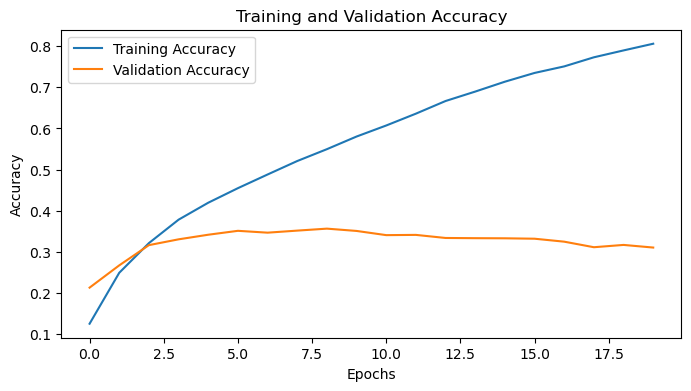

In [13]:
# extract accuracy data from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# plot accuracy
plt.figure(figsize=(8, 4))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


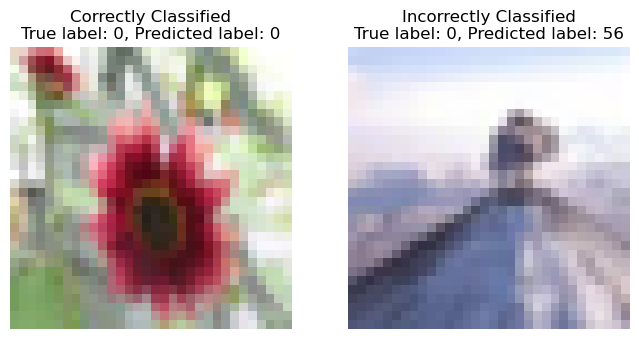

In [14]:
# get predictions from the model
predictions = model.predict(X_test)

# convert predictions and true labels from one-hot encoding to class indices
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# find indices of correctly and incorrectly classified examples
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# select one example from the correct and incorrect classifications
correct_index = correct_indices[0] # first correct classification
incorrect_index = incorrect_indices[0] # first incorrect classification

plt.figure(figsize=(8, 8))

# plot the correct image
plt.subplot(1, 2, 1)
plt.imshow(X_test[correct_index])
plt.title(f"Correctly Classified\nTrue label: {true_labels[correct_index]}, Predicted label: {predicted_labels[correct_index]}")
plt.axis('off')

# plot the incorrect image
plt.subplot(1, 2, 2)
plt.imshow(X_test[incorrect_index])
plt.title(f"Incorrectly Classified\nTrue label: {true_labels[incorrect_index]}, Predicted label: {predicted_labels[incorrect_index]}")
plt.axis('off')

plt.show()



## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [20]:
from tensorflow.keras.layers import Dropout

# create a Sequential model
model = Sequential()

# add a convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# add a convolutional layer with 64 filters, 5x5 kernel, and ReLU activation
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten the output from the convolutional layers
model.add(Flatten())

# add a fully connected dense layer with 128 units, ReLU activation, and Dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # dropout layer with a rate of 0.5

# add the output layer with 100 units (one for each class) and softmax activation
model.add(Dense(100, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 64)         

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [21]:
# Your code here
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(), # the default learning rate for Adam is 0.001
              metrics=['accuracy'])

In [22]:
# Your code here
# train the model
history = model.fit(
    X_train_split,           # training data
    y_train_split,           # training labels
    epochs=20,               # number of epochs
    batch_size=32,           # batch size
    validation_data=(X_val_split, y_val_split)) # validation data

Epoch 1/20
1250/1250 [==============================] - 16s 13ms/step - loss: 4.2048 - accuracy: 0.0602 - val_loss: 3.6978 - val_accuracy: 0.1469
Epoch 2/20
1250/1250 [==============================] - 15s 12ms/step - loss: 3.6935 - accuracy: 0.1296 - val_loss: 3.3192 - val_accuracy: 0.2194
Epoch 3/20
1250/1250 [==============================] - 16s 13ms/step - loss: 3.4652 - accuracy: 0.1706 - val_loss: 3.1655 - val_accuracy: 0.2423
Epoch 4/20
1250/1250 [==============================] - 16s 13ms/step - loss: 3.3234 - accuracy: 0.1934 - val_loss: 3.0356 - val_accuracy: 0.2684
Epoch 5/20
1250/1250 [==============================] - 15s 12ms/step - loss: 3.2146 - accuracy: 0.2109 - val_loss: 2.9258 - val_accuracy: 0.2781
Epoch 6/20
1250/1250 [==============================] - 15s 12ms/step - loss: 3.1422 - accuracy: 0.2248 - val_loss: 2.8718 - val_accuracy: 0.2900
Epoch 7/20
1250/1250 [==============================] - 15s 12ms/step - loss: 3.0701 - accuracy: 0.2375 - val_loss: 2.8282 -

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

<b>Accuracy Improvement:</b>

Previous Model: Training accuracy increased from 0.1249 to 0.8060, and validation accuracy from 0.2127 to 0.3102.\
Current Model with Dropout: Training accuracy started at 0.0602 and reached 0.3220, with validation accuracy improving from 0.1469 to 0.3590.

Dropout improved validation accuracy more than the previous model, indicating better generalization despite the initial lower training accuracy.

<b>Loss Reduction:</b>

Previous Model: Training loss fell from 3.8053 to 0.6386, but validation loss ranged from 3.2890 to 5.0463.\
Current Model with Dropout: Training loss decreased from 4.2048 to 2.6115, and validation loss dropped from 3.6978 to 2.5306.

The dropout model shows a slower training loss reduction but improved validation performance, highlighting a trade-off between training loss and generalization. In summary, while dropout improved generalization, further optimization and exploration of additional techniques could lead to better results.

<b>Other Techniques for Further Improvements:</b>

Experimenting with different learning rates, data augmentation, and advanced architectures such as adding additional convolutional layers or Batch Normalization could further enhance performance. Regularization methods like L2 regularization might also be beneficial.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.